# Testing Space


In [13]:
from oggm import graphics, workflow, DEFAULT_BASE_URL
import dtcg.interface.gateway as interface_gateway
import salem

For forward compatibility, a user interacts with DTCG only through API requests. This means a single centralised framework can handle requests from Jupyter notebooks, websites, and cli wrappers.

In [14]:
# An example API call to select glacier data from a specific region.
user_query = {
    "query": "select_region",
    "region_name": "Alps",
    "oggm_params": {
        "use_multiprocessing": True,
    },
}

Until the internal API is fully implemented, demo requests are handled directly via the ``gateway`` module:

In [15]:
request = interface_gateway._set_user_query(**user_query)
response = interface_gateway.get_query_response(query=request);

2025-01-20 16:47:52: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-01-20 16:47:52: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-01-20 16:47:52: oggm.cfg: Multiprocessing: using all available processors (N=22)
2025-01-20 16:47:53: oggm.cfg: Multiprocessing switched ON after user settings.


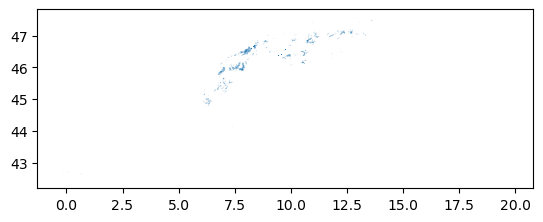

In [16]:
response["data"].plot();

In [17]:
gdirs = workflow.init_glacier_directories(
    response["data"],
    prepro_border=80,
    prepro_base_url=DEFAULT_BASE_URL,
    from_prepro_level=4,
)

2025-01-20 16:47:55: oggm.workflow: init_glacier_directories from prepro level 4 on 3927 glaciers.
2025-01-20 16:47:55: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 3927 glaciers


<Axes: >

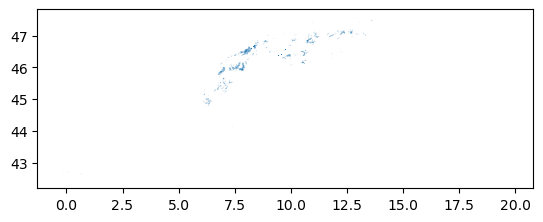

In [23]:
response["data"].plot()

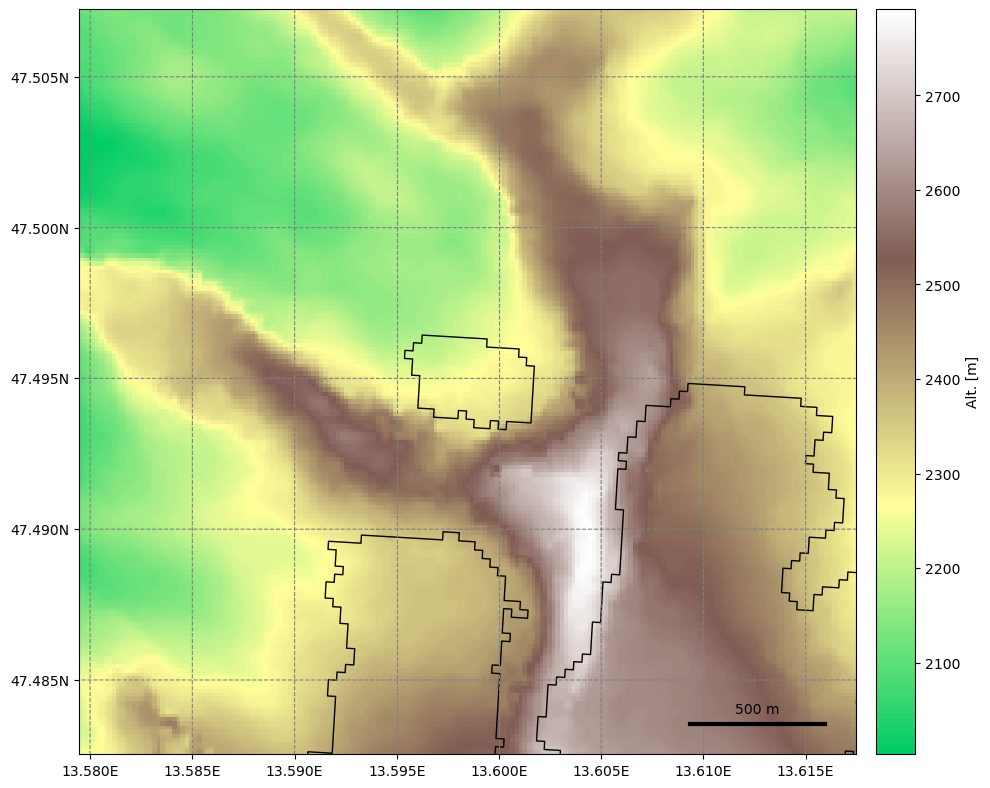

In [40]:
smap = salem.Map(gdirs[0].grid)
graphics.plot_domain(gdirs[0:10], smap=smap, figsize=(10, 20), use_netcdf=True);